## Required funcitons implementation

Libraries import

In [6]:
import numpy as np
import cv2  
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

Weiner filter function defenition

In [7]:
def wiener_filter_image(noisy_image, kernel, noise_variance):
    # FFT of the image and kernel
    H = np.fft.fft2(kernel, s=noisy_image.shape)
    G = np.fft.fft2(noisy_image)

    # Compute power spectrum of the kernel
    H_conj = np.conj(H)
    H_abs2 = np.abs(H)**2

    # Wiener filter
    W = H_conj / (H_abs2 + noise_variance)
    F_hat = W * G

    # Inverse FFT
    filtered_image = np.fft.ifft2(F_hat)
    return np.abs(filtered_image)

Noisy image generator

In [8]:
def generate_noisy_image(image, kernel, noise_level):
    blurred_image = convolve2d(image, kernel, mode='same', boundary='wrap')
    
    noisy_image = blurred_image + noise_level * np.random.randn(*blurred_image.shape)
    return noisy_image

## Tests

Loading images for test

In [9]:
lena = cv2.imread(cv2.samples.findFile("lena.jpg"), cv2.IMREAD_GRAYSCALE) / 255.0  # Normalize
square = cv2.imread(cv2.samples.findFile("square.jpg"),cv2.IMREAD_GRAYSCALE) / 255.0

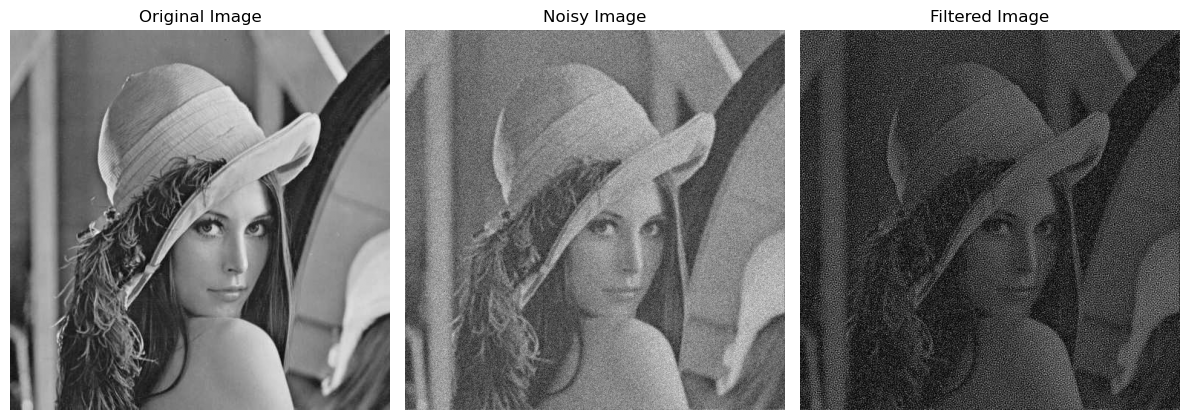

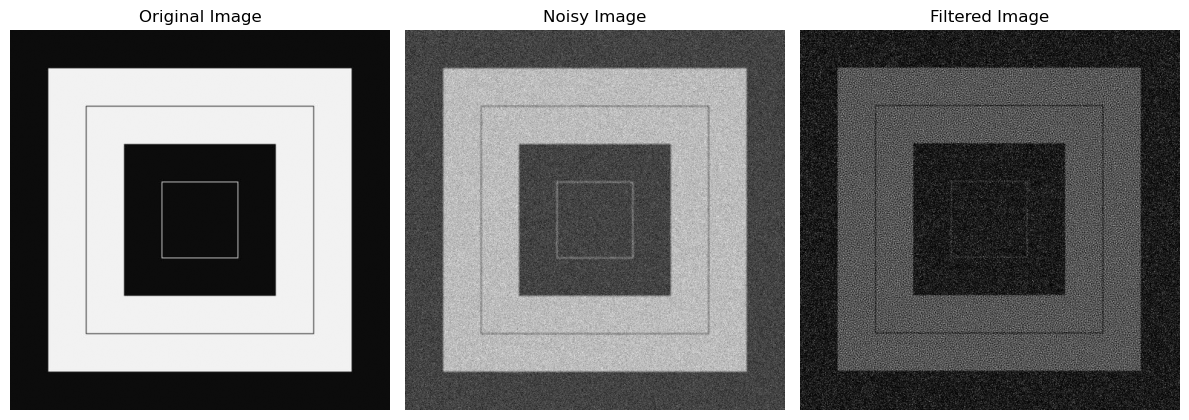

In [10]:
# Blur kernal
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9

# Noisy image
noise_level = 0.1 
noisy_lena = generate_noisy_image(lena, kernel, noise_level)
noisy_square = generate_noisy_image(square, kernel, noise_level)

noise_variance = noise_level**2

filtered_lena = wiener_filter_image(noisy_lena, kernel, noise_variance)
filtered_square = wiener_filter_image(noisy_square, kernel, noise_variance)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(lena, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_lena, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Filtered Image")
plt.imshow(filtered_lena, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(square, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_square, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Filtered Image")
plt.imshow(filtered_square, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()